# Haar-旋轉圖比較

In [1]:
import numpy as np
import cv2 as cv

### 載入剛剛介紹的showImage（這裡就不展開介紹，有興趣請自行參閱）

In [2]:
%run ./base/show.ipynb

## __1.__ 建構CascadeClassifier，從硬碟中讀取模型

In [3]:
#cascade=cv.CascadeClassifier(model_location)
#cascade:建構出來的分類器
#model_location:模型的存放位置
face_cascade = cv.CascadeClassifier('./assets/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('./assets/haarcascades/haarcascade_eye.xml')

## __2.__ 將需要用到的圖載入

`people_normal.jpg`為正常角度的照片

`people_turn_30.png`則是將以上的圖片旋轉30度


In [4]:
normal_img = cv.imread('./img/people_normal.jpg')
turn_30_img=cv.imread('./img/people_turn_30.png')


gray_normal_img = cv.cvtColor(normal_img, cv.COLOR_BGR2GRAY)
gray_turn_30_img = cv.cvtColor(turn_30_img, cv.COLOR_BGR2GRAY)


## __3.__ 分別將圖進行辨識，並將辨識結果畫在原圖上
#### 正常角度的照片辨識

In [5]:

faces_normal=[]
faces_normal = face_cascade.detectMultiScale(gray_normal_img, 1.2, 5)

for (x,y,w,h) in faces_normal:
    cv.rectangle(normal_img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_normal_img[y:y+h, x:x+w]
    roi_color = normal_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.2, 5)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


#### 旋轉30度的照片辨識

In [6]:
faces_turn_30=[]
faces_turn_30 = face_cascade.detectMultiScale(gray_turn_30_img, 1.5, 5)
     
for (x,y,w,h) in faces_turn_30:
    cv.rectangle(turn_30_img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_turn_30_img[y:y+h, x:x+w]
    roi_color = turn_30_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.2, 5)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
      

## __4.__ 最後將圖顯示出來
可以發現經過旋轉過後，幾乎沒辦法辨識人臉與眼睛

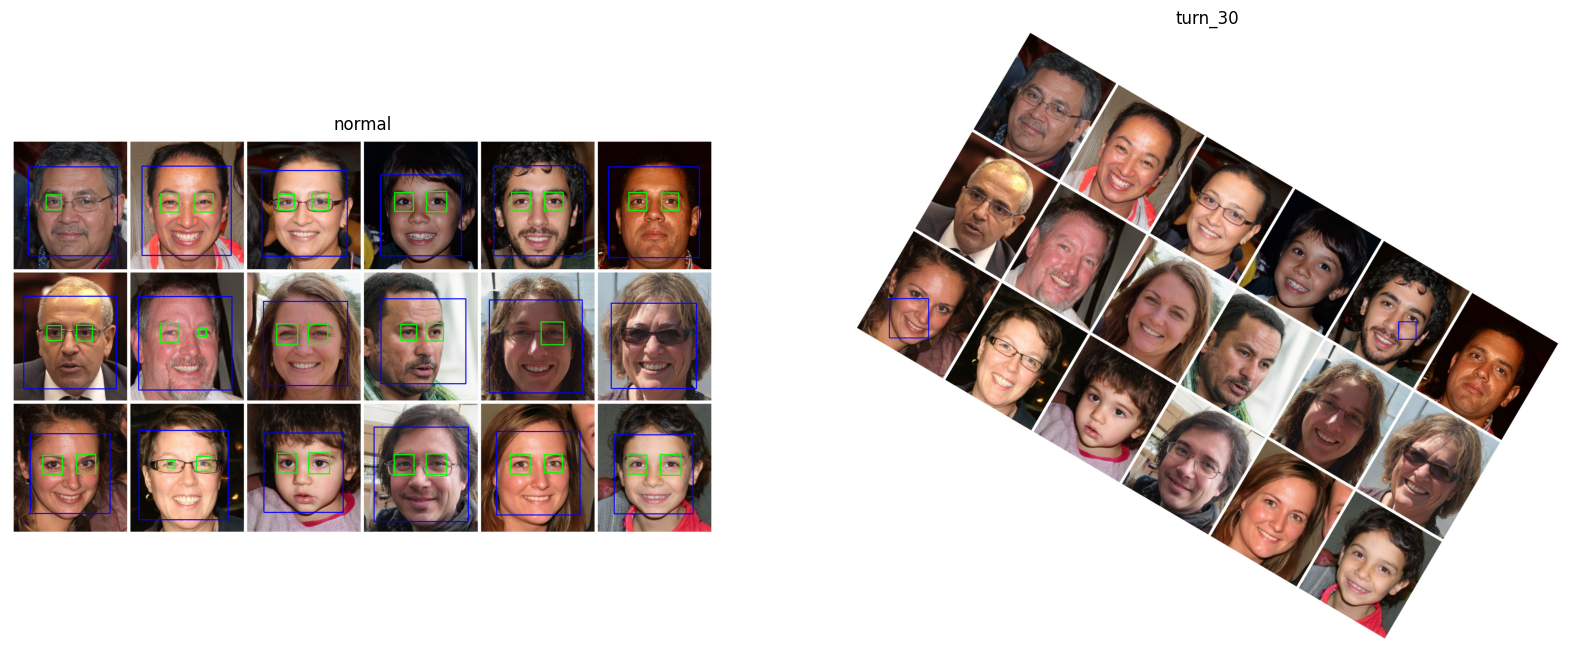

In [7]:
plt.figure(figsize=(20,20))
showImage(normal_img,"normal",1,2,1)
showImage(turn_30_img,"turn_30",1,2,2)

# 不同角度人臉
---
## __1.__ 將`./img/face`不同角度的人臉載入

In [8]:
face_imgs=[]

face_imgs.append(cv.imread('./img/face/face_up_left_90.png'))
face_imgs.append(cv.imread('./img/face/face_up_left_45.png'))
face_imgs.append(cv.imread('./img/face/face_up_center.png'))
face_imgs.append(cv.imread('./img/face/face_up_right_45.png'))
face_imgs.append(cv.imread('./img/face/face_up_right_90.png'))

face_imgs.append(cv.imread('./img/face/face_left_90.png'))
face_imgs.append(cv.imread('./img/face/face_left_45.png'))
face_imgs.append(cv.imread('./img/face/face_center.png'))
face_imgs.append(cv.imread('./img/face/face_right_45.png'))
face_imgs.append(cv.imread('./img/face/face_right_90.png'))

face_imgs.append(cv.imread('./img/face/face_down_left_90.png'))
face_imgs.append(cv.imread('./img/face/face_down_left_45.png'))
face_imgs.append(cv.imread('./img/face/face_down_center.png'))
face_imgs.append(cv.imread('./img/face/face_down_right_45.png'))
face_imgs.append(cv.imread('./img/face/face_down_right_90.png'))

## __2.__ 將載入的圖片轉成灰階圖

In [9]:
face_gray_imgs=[]

gray_turn_30_img = cv.cvtColor(turn_30_img, cv.COLOR_BGR2GRAY)

for i in range(0,len(face_imgs)):
    tmp=cv.cvtColor(face_imgs[i], cv.COLOR_BGR2GRAY)
    face_gray_imgs.append(tmp)

## __3.__ 分別將圖進行辨識，並將辨識結果畫在原圖上

In [10]:
for i in range(0,len(face_imgs)):
    faces = face_cascade.detectMultiScale(face_gray_imgs[i], 1.5, 5)
    
    for (x,y,w,h) in faces:
        cv.rectangle(face_imgs[i],(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = face_gray_imgs[i][y:y+h, x:x+w]
        roi_color = face_imgs[i][y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.2, 5)
        for (ex,ey,ew,eh) in eyes:
            cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

## __4.__ 最後將圖顯示出來

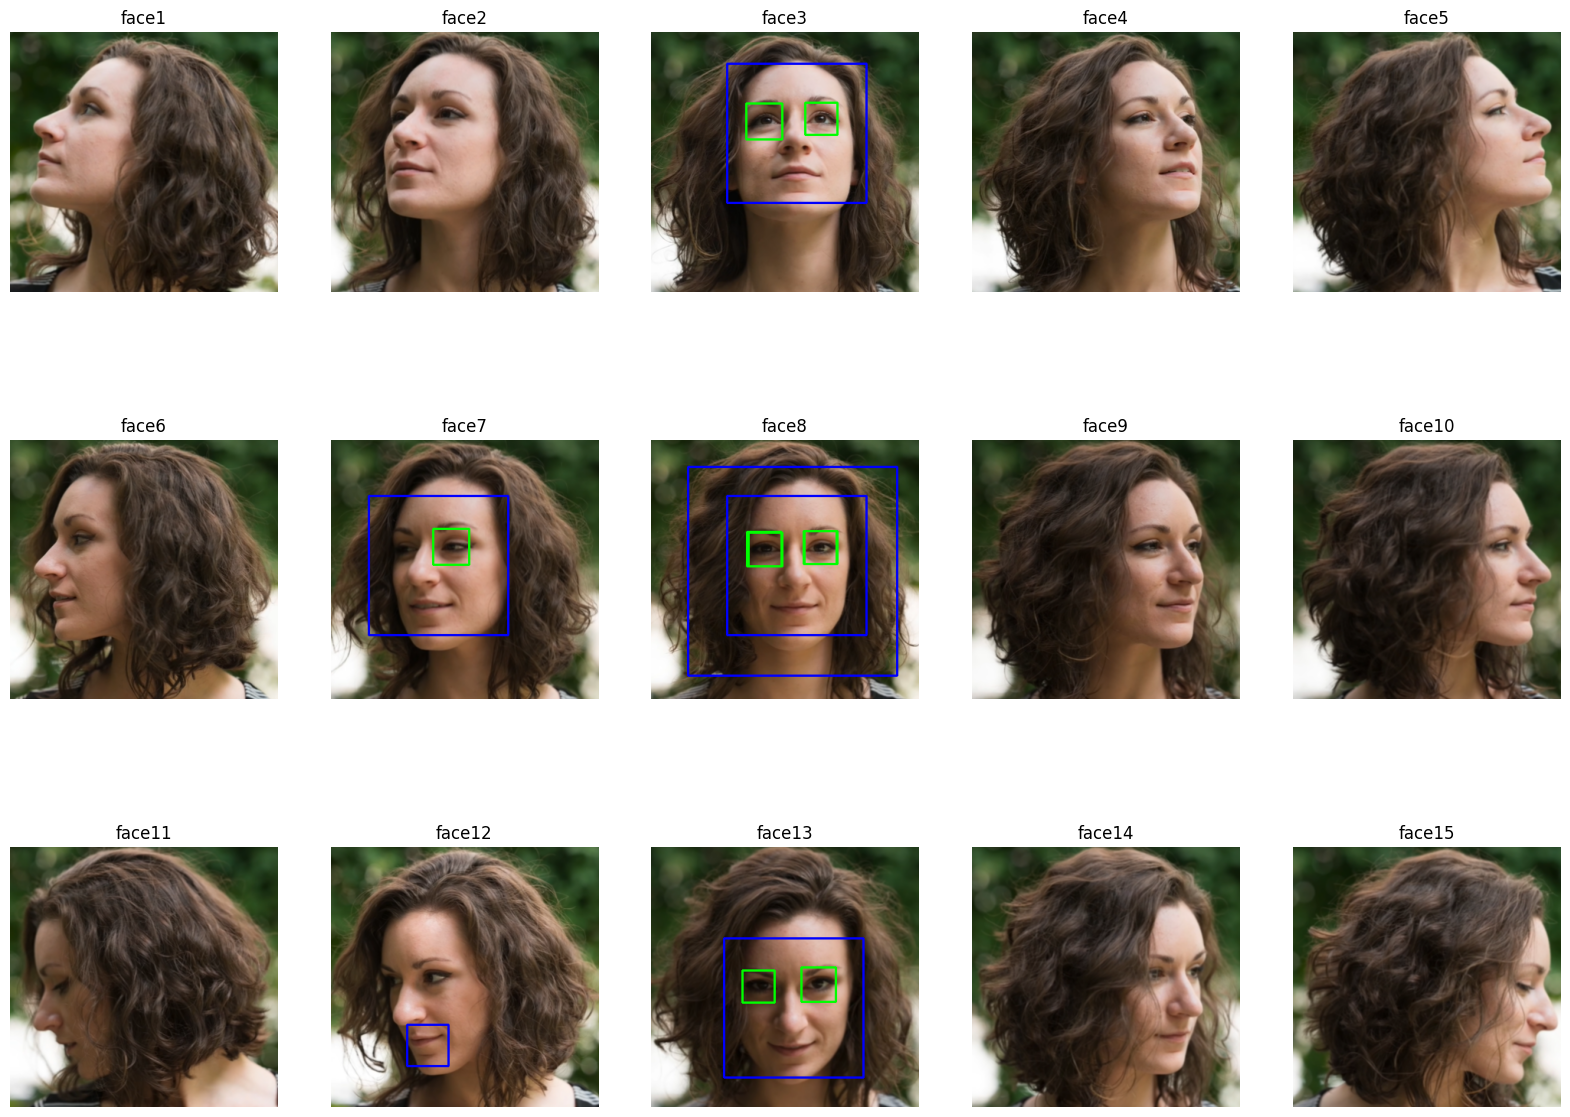

In [11]:
plt.figure(figsize=(20,15))

row=3
col=5
num=1

for i in range(0,len(face_imgs)):
    name='face'+str(i+1)
    tmp_face_img=face_imgs[i].copy()
    showImage(tmp_face_img,name,sub_row=row,sub_col=col,sub_num=num)
    num+=1